# Help! Find My Baby...

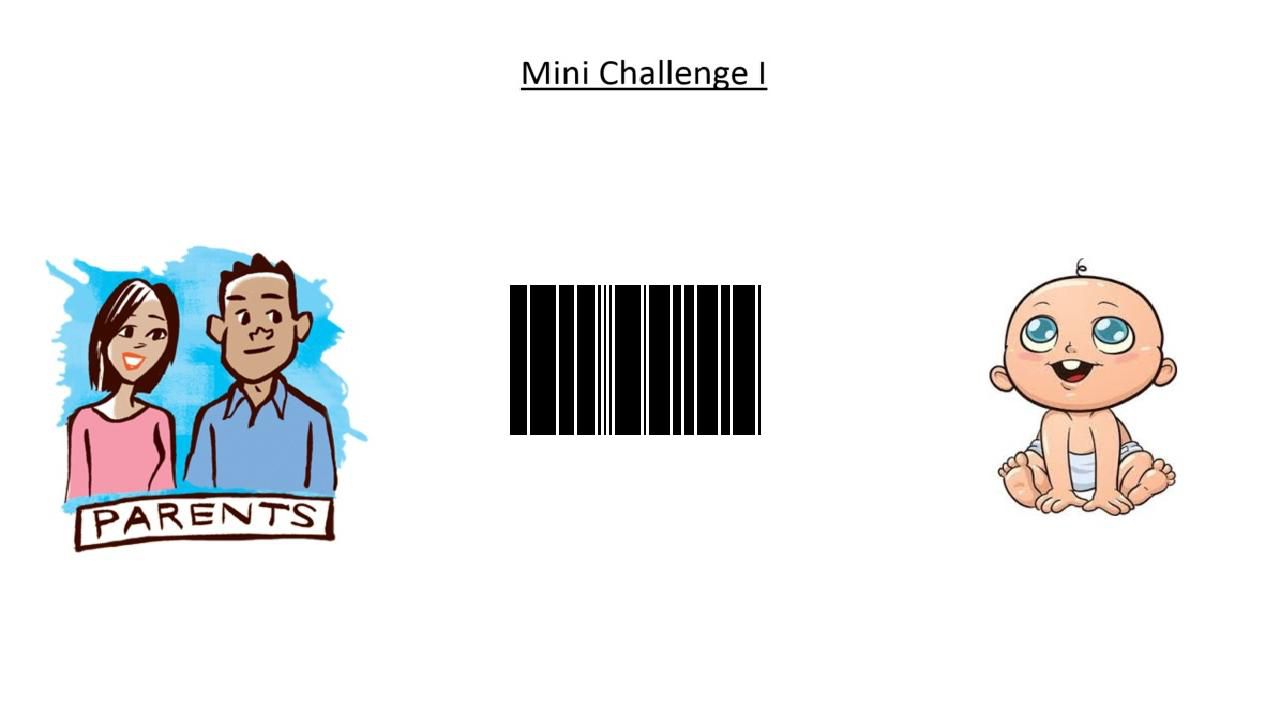

In [108]:
from PIL import Image
image_file = "minichallenge_1.jpg"
img = Image.open(image_file)
img

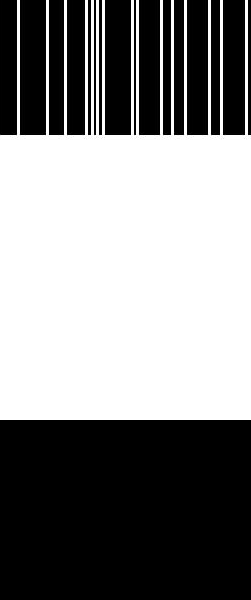

In [43]:
width = 251
height = 600
st_x = 510
st_y = 300
croped = img.crop((st_x, st_y, st_x+width, st_y+height))
croped

In [87]:
bits = []
for i in range(0, croped.size[0], 1):
    bits.append(0 if croped.getpixel((i,0))[0] < 50 else 1)
string = "".join([str(bit) for bit in bits])
string

'00000000000000000111000000000000000000000000001110000000000000001110000000000000000001110001110011100011100000000000000000000000000111001110000000000000000000001110000000011100000000001110000000000000000000001110000000001110000000000000000000000111000'

In [55]:
import struct
bytestring = bytes()
for i in range(0, len(string), 8):
    bytestring += struct.pack('B', int(string[i:i+8], 2))
print(bytestring)
print([int(b) for b in bytestring])
len(string)

b'\x02\x00\x82\x05\xa0\n\x02B\x02 \x02'
[2, 0, 130, 5, 160, 10, 2, 66, 2, 32, 2]


84

In [102]:
index = 0
count = 0
array = []
while index < len(string) - 1:
    if string[index] == '0':
        count+=1
        index+=1
    else:
        array.append(count)
        count = 0
        while string[index] == '1':
            index += 1
array.append(count+1)
len(array)
array
array = [i-1 for i in array]

In [84]:
conv = []
for i in range(0, len(array), 2):
    conv.append(array[i]<<4 | array[i+1])
[hex(i) for i in conv]

['0x69', '0x56', '0x10', '0x19', '0x17', '0x24', '0x73', '0x70']

In [85]:
bytestring = b''
for i in conv:
    bytestring += struct.pack('B', i)
bytestring.decode('ascii')

'iV\x10\x19\x17$sp'

In [97]:
def checksol(array, shift):
    bstring = b''
    for i in array:
        num = 0x40 + i + shift
        if num > 0x40 + 26:
            num -= 26
        bstring += struct.pack('B', num)
    return bstring.decode('ascii')

In [105]:
checksol(array, 0)

'PYNQBABYATGITHUB'

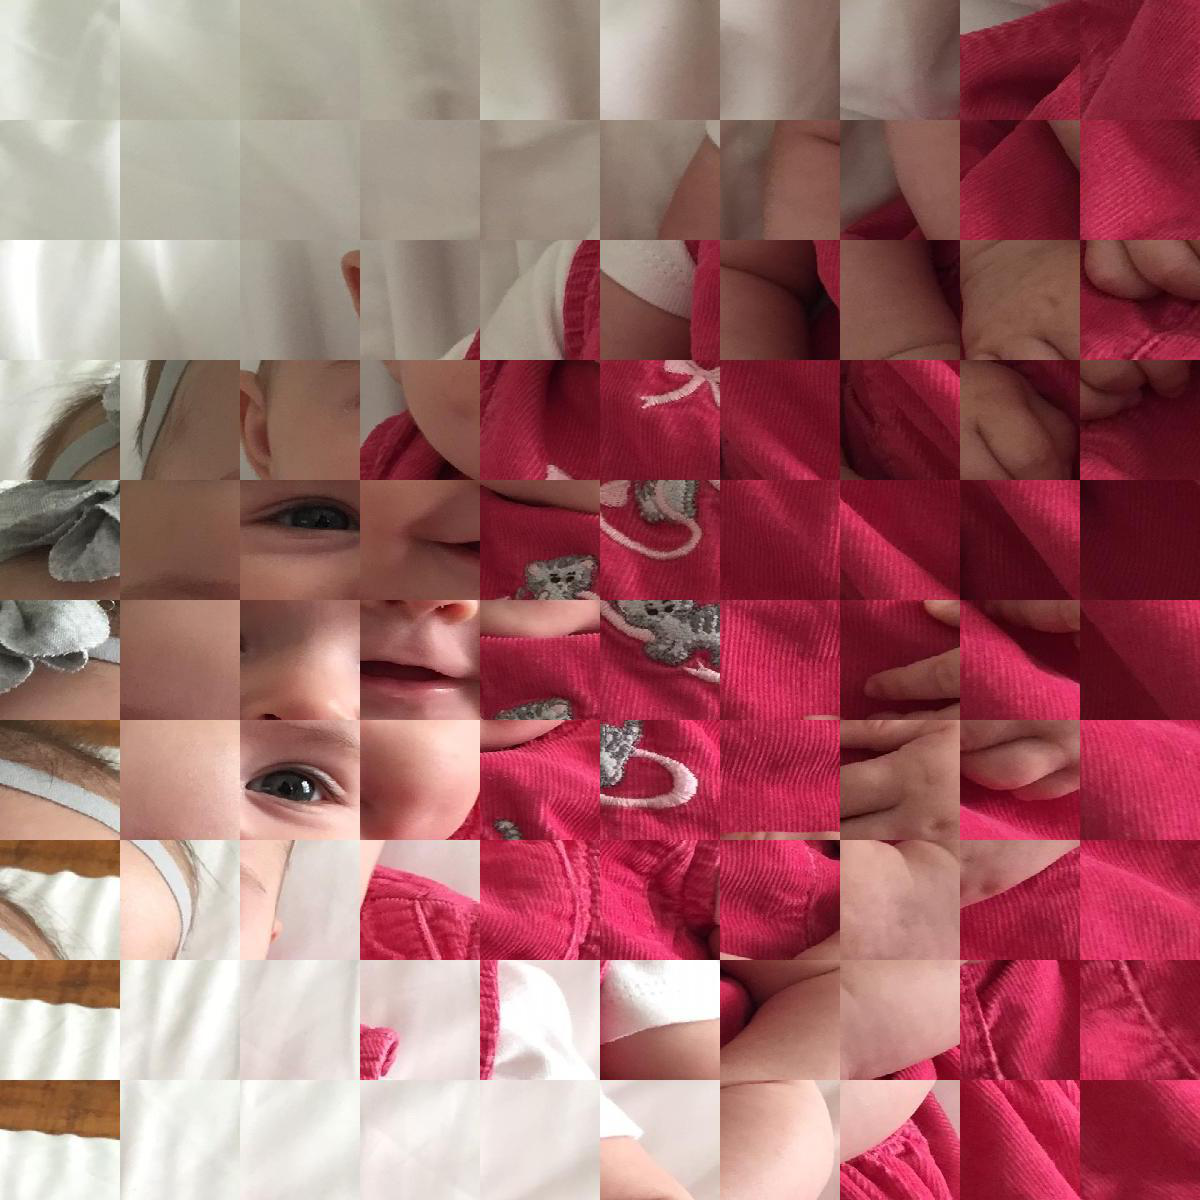

In [107]:
image_file = "baby_help.JPG"
img2 = Image.open(image_file)
img2

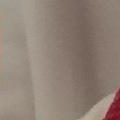

In [129]:
chunksize = 120
array_im = []
for i in range(10):
    row = []
    for j in range(10):
        row.append(img2.crop((j*120, i*120, j*120+120, i*120+120)))
    array_im.append(row)
    
array_im[2][3]

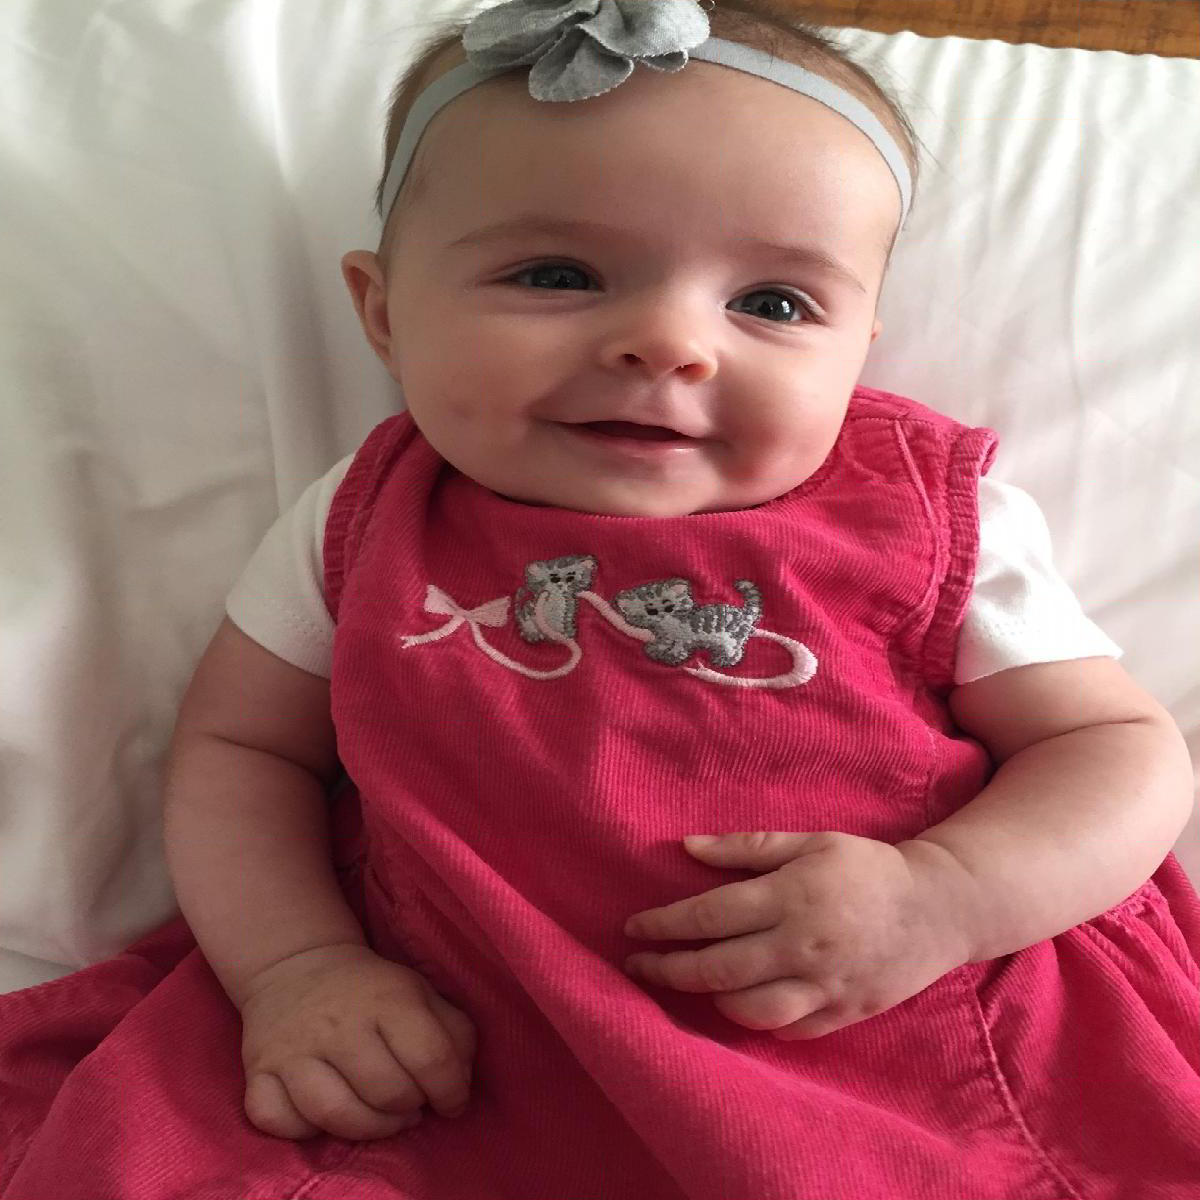

In [131]:
result = Image.new('RGB', (1200, 1200))
for i in range(10):
    for j in range(10):
        result.paste(im=array_im[j][i], box=(j*120, i*120))
result
